In [64]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
from sklearn.decomposition import PCA

In [65]:
digits = load_digits()

X = digits.images  
y = digits.target  
X[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

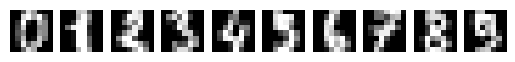

In [66]:
n_images = 10

for i in range(n_images):
    plt.subplot(1, n_images, i + 1) # dispone 10 immagini su una singola riga
    plt.imshow(X[i], cmap='gray') # scala di grigi per i pixel di ogni elemento
    plt.axis('off')

plt.show()

In [67]:
X = digits.images.reshape(digits.images.shape[0], -1)
print(X[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

0.9805555555555555


In [77]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model2 = SVC()

model2.fit(X_train_2, y_train_2)

y_pred_2 = model2.predict(X_test_2)

print(classification_report(y_test_2, y_pred_2))
print(accuracy_score(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        33
           1       0.34      0.57      0.43        28
           2       0.61      0.52      0.56        33
           3       0.38      0.47      0.42        34
           4       0.98      0.91      0.94        46
           5       0.36      0.09      0.14        47
           6       0.89      0.89      0.89        35
           7       0.67      0.76      0.71        34
           8       0.19      0.23      0.21        30
           9       0.40      0.40      0.40        40

    accuracy                           0.55       360
   macro avg       0.54      0.56      0.54       360
weighted avg       0.56      0.55      0.54       360

0.5527777777777778
